In [11]:
#General 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib

#model
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,precision_recall_curve, average_precision_score, classification_report, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [12]:
#Data Reading
AGTC_mixed_data = pd.read_csv('F:\Sequence Prediction\Seperate Class Output/classes_AGTC_new.csv')

In [1]:
AGTC_mixed_data.shape

NameError: name 'AGTC_mixed_data' is not defined

In [2]:
AGTC_mixed_data.head()

NameError: name 'AGTC_mixed_data' is not defined

In [18]:
#AGTC_mixed_data.rename(columns={ 'Label':'label','Feature01':'f0','Feature02':'f1','Feature03':'f2','Feature04':'f3','Feature05':'f4','Feature06':'f5','Feature07':'f6','Feature08':'f7','Feature09':'f8','Feature0A':'f9','Feature0B':'f10','Feature0C':'f11','Feature11':'f12','Feature12':'f13','Feature13':'f14','Feature14':'f15','Feature15':'f16','Feature16':'f17','Feature17':'f18','Feature18':'f19','Feature19':'f20','Feature1A':'f21','Feature1B':'f22','Feature1C':'f23','Feature21':'f24','Feature22':'f25','Feature23':'f26','Feature24':'f27','Feature25':'f28','Feature26':'f29','Feature27':'f30','Feature28':'f31','Feature29':'f32','Feature2A':'f33','Feature2B':'f34','Feature2C':'f35','Feature31':'f36','Feature32':'f37','Feature33':'f38','Feature34':'f39','Feature35':'f40','Feature36':'f41','Feature37':'f42','Feature38':'f43','Feature39':'f44','Feature3A':'f45','Feature3B':'f46','Feature3C':'f47'}, inplace=True)

In [20]:
# Save the modified dataset with the new column name
#AGTC_mixed_data.to_csv('F:\Seperate Class Output/classes_AGTC_new.csv', index=False)

In [3]:
#Missing Values
print('number of missing values in MixedBase data:', sum(AGTC_mixed_data.isnull().sum()))

#Duplicate values
print('\n''number of duplicates values in MixedBase data:', AGTC_mixed_data.duplicated().sum())


NameError: name 'AGTC_mixed_data' is not defined

In [6]:
#Dropping duplicates in dataset
AGTC_mixed_data = AGTC_mixed_data.drop_duplicates()

In [4]:
AGTC_mixed_data.shape

NameError: name 'AGTC_mixed_data' is not defined

In [15]:
# sepearte feature and label
X = AGTC_mixed_data.drop('label', axis='columns')
Y = AGTC_mixed_data['label']

In [16]:
# label Encoding as Xgboost works for label 0 to sequencially
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

In [5]:
#Count of each labels
unique_values, counts = np.unique(Y_encoded,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [11]:
# mapping from encoded values to original labels
label_mapping = {encoded: original for encoded, original in zip(Y_encoded,Y)}

#Location of mapping 
AGTC_model_label_mapping_path = 'C:\\Users\\cr245297\\Documents\\Python Scripts\\AGTC_model_label_mapping.joblib'

# Save the label mapping to a joblib file
joblib.dump(label_mapping, AGTC_model_label_mapping_path)

# load the saved model from the joblib file
label_mapping = joblib.load(AGTC_model_label_mapping_path)

In [19]:
#splitting the dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_encoded,test_size=0.001, random_state =42, stratify = Y_encoded)

In [13]:
#XG Boost model
xgb_model = xgb.XGBClassifier(
    max_depth = 3,
    subsample = 0.8,
    n_estimators = 1000,
    learning_rate = 0.1,
    objective = "multi:softmax",
    num_class = 6,
    n_jobs = -1,
    random_state = 42
    )

In [14]:
#Random Forest Model
RandomForest_model = RandomForestClassifier(
    n_estimators=1000,
    n_jobs=-1,
    random_state=52,
    class_weight='balanced'
)

In [15]:
#votiing classifier with probability based voting 
voting_classifier = VotingClassifier(estimators=[('xgb', xgb_model),('rf', RandomForest_model)],voting='soft', flatten_transform=False)

In [16]:
#train the voting_classifier on the training data
voting_classifier.fit(X_train,Y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=1000, n_jobs=-1,
                                            num_class=6, num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=52))],
                 flatten_transform=False, voting='soft')

In [17]:
# saving the model 

# file path for saving the model
AGTC_model_path = 'F:\\Different Models\\AGTC_model_xgbRF.joblib'

# save the modelto the path 
joblib.dump(voting_classifier, AGTC_model_path)

# load the saved model from the joblib file
AGTC_model_loaded = joblib.load(AGTC_model_path)

In [18]:
# prediction
Y_pred = AGTC_model_loaded.predict(X_test)

In [19]:
# Evaluate the model's performance
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323518
           1       1.00      1.00      1.00    295255
           2       1.00      1.00      1.00    415215
           3       1.00      1.00      1.00    249522

    accuracy                           1.00   1283510
   macro avg       1.00      1.00      1.00   1283510
weighted avg       1.00      1.00      1.00   1283510



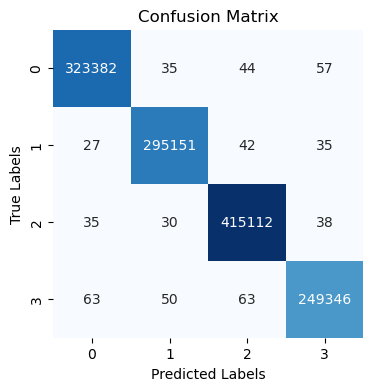

In [20]:
#compute the confusion metrix
cm = confusion_matrix(Y_test,Y_pred)

#display using heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Calculate class-wise precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred, average=None)
recall = recall_score(Y_test, Y_pred, average=None)
f1 = f1_score(Y_test, Y_pred, average=None)


# Calculate class-wise accuracy

class_accuracy = []
for class_label in range(len(precision)):
    class_samples = (Y_test == class_label).sum()
    class_correct = np.logical_and(Y_test == Y_pred, Y_test == class_label).sum()
    class_accuracy.append(class_correct / class_samples)

# Print the class-wise metrics
for class_label in range(len(precision)):
   print(f"Class {class_label}:")
   print(f"Accuracy: {class_accuracy[class_label]}")
   print(f"Precision: {precision[class_label]}")
   print(f"Recall: {recall[class_label]}")
   print(f"F1-Score: {f1[class_label]}")
   print()

Class 0:
Accuracy: 0.9995796215357414
Precision: 0.9996136095973194
Recall: 0.9995796215357414
F1-Score: 0.9995966152776168

Class 1:
Accuracy: 0.999647762103944
Precision: 0.9996105206830451
Recall: 0.999647762103944
F1-Score: 0.9996291410466351

Class 2:
Accuracy: 0.9997519357441326
Precision: 0.9996411895169544
Recall: 0.9997519357441326
F1-Score: 0.9996965595634312

Class 3:
Accuracy: 0.999294651373426
Precision: 0.9994789077907293
Recall: 0.999294651373426
F1-Score: 0.9993867710892629



In [22]:
# function to decode the encoded values

def decode_labels(encoded_values, label_mapping):

    decoded_values = [label_mapping[encoded] for encoded in encoded_values]

    return decoded_values


# Using the decoding function to get the decoded predictions

Y_pred_decoded = decode_labels(Y_pred, label_mapping)



In [6]:
unique_values, counts = np.unique(Y_pred_decoded,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [7]:
unique_values, counts = np.unique(Y_pred,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [8]:
unique_values, counts = np.unique(Y_test,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [9]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X_test)

NameError: name 'X_test' is not defined

C:\Users\cr245297\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



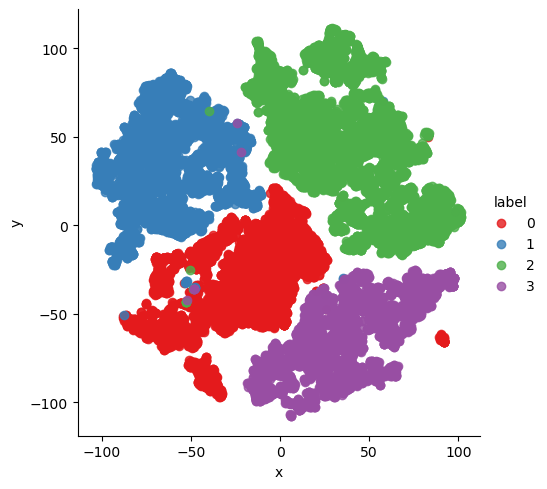

In [23]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':Y_test})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1")

In [10]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X_test)

NameError: name 'X_test' is not defined

In [21]:
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = Y_test ,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')
